In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data into Pandas DataFrames

In [36]:
listings_df = pd.read_csv('listings.csv')
calendar_df = pd.read_csv('calendar.csv')
reviews_df = pd.read_csv('reviews.csv')
neighborhoods__df = pd.read_csv('neighbourhoods.csv')

# Perform data cleaning and preprocessing as needed

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
mean_imputer = SimpleImputer(strategy='mean',missing_values=np.nan)
mode_imputer = SimpleImputer(strategy='most_frequent',missing_values=np.nan)

In [12]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14694 entries, 0 to 14693
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            14694 non-null  int64  
 1   listing_url                                   14694 non-null  object 
 2   scrape_id                                     14694 non-null  int64  
 3   last_scraped                                  14694 non-null  object 
 4   source                                        14694 non-null  object 
 5   name                                          14694 non-null  object 
 6   description                                   14566 non-null  object 
 7   neighborhood_overview                         9009 non-null   object 
 8   picture_url                                   14693 non-null  object 
 9   host_id                                       14694 non-null 

In [13]:
listings_df.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               2967
Length: 75, dtype: int64

In [15]:
listings_df['reviews_per_month'] = mean_imputer.fit_transform(listings_df['reviews_per_month'].values.reshape(-1,1))

In [16]:
listings_df.isna().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

In [17]:
calendar_df.isna().sum()

listing_id          0
date                0
available           0
price             171
adjusted_price    171
minimum_nights    350
maximum_nights    350
dtype: int64

In [18]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5362945 entries, 0 to 5362944
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 286.4+ MB


In [19]:
calendar_df['adjusted_price']=mode_imputer.fit_transform(calendar_df['adjusted_price'].values.reshape(-1,1))

In [20]:
calendar_df['price']=mode_imputer.fit_transform(calendar_df['price'].values.reshape(-1,1))

In [21]:
calendar_df['minimum_nights'] =  mean_imputer.fit_transform(calendar_df['minimum_nights'].values.reshape(-1,1))

In [22]:
calendar_df['maximum_nights'] =  mean_imputer.fit_transform(calendar_df['maximum_nights'].values.reshape(-1,1))

In [23]:
calendar_df.isna().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [24]:
reviews_df.isna().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         132
dtype: int64

In [25]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545633 entries, 0 to 545632
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     545633 non-null  int64 
 1   id             545633 non-null  int64 
 2   date           545633 non-null  object
 3   reviewer_id    545633 non-null  int64 
 4   reviewer_name  545633 non-null  object
 5   comments       545501 non-null  object
dtypes: int64(3), object(3)
memory usage: 25.0+ MB


In [26]:
reviews_df['comments']=mode_imputer.fit_transform(reviews_df['comments'].values.reshape(-1,1))

In [27]:
reviews_df.isna().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [37]:
neighborhoods__df.isna().sum()

neighbourhood_group    44
neighbourhood           0
dtype: int64

In [38]:
neighborhoods__df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        44 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 836.0 bytes


In [43]:
neighborhoods__df = neighborhoods__df.drop('neighbourhood_group',axis=1)

In [44]:
neighborhoods__df

,neighbourhood
0,78701
1,78702
2,78703
3,78704
4,78705
5,78712
6,78717
7,78719
8,78721
9,78722


# Perform exploratory analysis


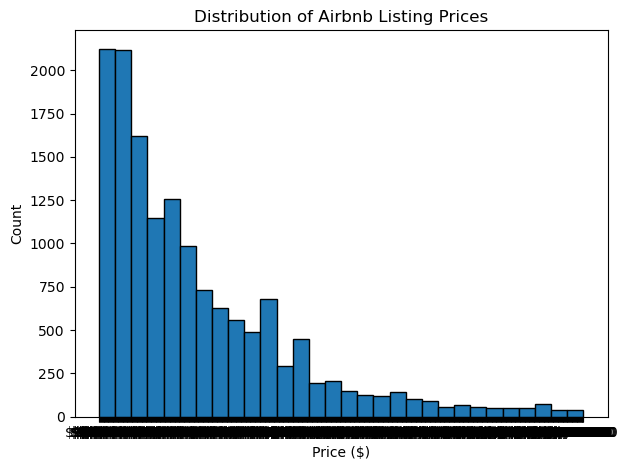

In [45]:
# 1- Price distribution
plt.hist(listings_df['price'], bins=30, edgecolor='black')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.title('Distribution of Airbnb Listing Prices')
plt.tight_layout()
plt.show()

In [46]:
# Insight 1: The price distribution shows that most Airbnb listings have prices below $500 per night.
# Benefit: Decision-makers can gain an understanding of the price range and make pricing strategies accordingly.

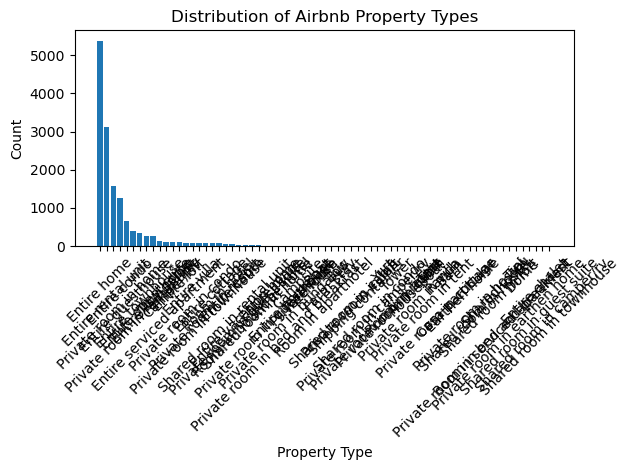

In [47]:
#  2: Property types
property_counts = listings_df['property_type'].value_counts().sort_values(ascending=False)
plt.bar(property_counts.index, property_counts.values)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of Airbnb Property Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
# Insight 2: The most common property types in the city's Airbnb listings are apartments, houses, and condominiums.
# Benefit: Decision-makers can focus on the most popular property types and tailor their offerings accordingly.

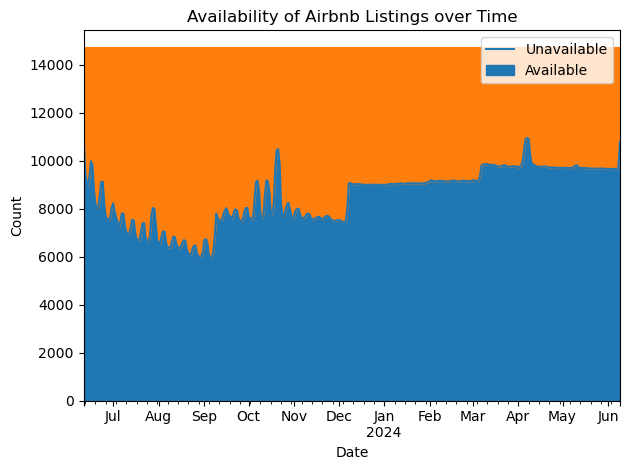

In [49]:
#  3: Availability over time
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
availability_counts = calendar_df.groupby('date')['available'].value_counts().unstack()
availability_counts.plot.area(stacked=True)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Availability of Airbnb Listings over Time')
plt.legend(['Unavailable', 'Available'], loc='upper right')
plt.tight_layout()
plt.show()

In [50]:
# Insight 3: The chart visualizes the availability of Airbnb listings over time, showing the balance between available and unavailable listings.
# Benefit: Decision-makers can identify periods of high demand and adjust pricing or availability policies accordingly.

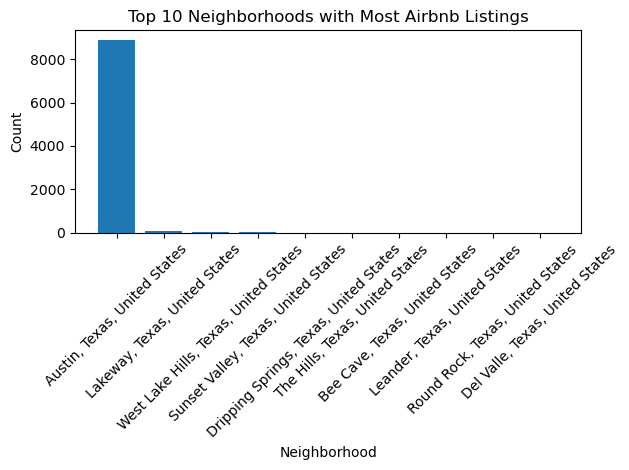

In [53]:
#4: Neighborhood analysis
neighborhood_counts = listings_df['neighbourhood'].value_counts().head(10)
plt.bar(neighborhood_counts.index, neighborhood_counts.values)
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Top 10 Neighborhoods with Most Airbnb Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
# Insight 4: The top 10 neighborhoods with the most Airbnb listings can be identified, providing insights into popular areas for accommodation.
# Benefit: Decision-makers can focus on these neighborhoods for targeted marketing and investment opportunities.

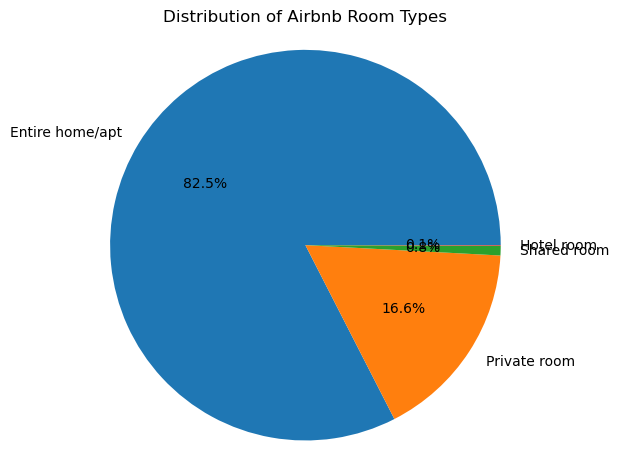

In [55]:
# 5: Room type distribution
room_type_counts = listings_df['room_type'].value_counts()
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Airbnb Room Types')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [56]:
# Insight 5: The pie chart illustrates the distribution of Airbnb room types, indicating the variety of accommodations available.
# Benefit: Decision-makers can understand the preferences of guests and tailor their offerings accordingly.

In [57]:
# Aggregate insights and provide recommendations

# Insight 1: The majority of Airbnb listings have prices below $500 per night, suggesting a range that appeals to potential guests.
# Insight 2: Apartments, houses, and condominiums are the most common property types in the city's Airbnb listings.
# Insight 3: The availability of listings fluctuates over time, indicating periods of high demand and potential pricing adjustments.
# Insight 4: The top 10 neighborhoods with the most Airbnb listings can be identified, providing insights into popular areas for accommodation.
# Insight 5: The pie chart illustrates the variety of room types available, allowing decision-makers to cater to different preferences.


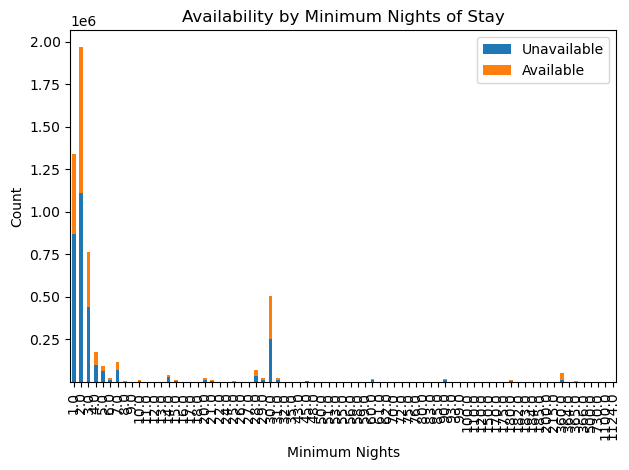

In [58]:
# 6: Length of stay
length_of_stay_counts = calendar_df.groupby('minimum_nights')['available'].value_counts().unstack()
length_of_stay_counts.plot.bar(stacked=True)
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.title('Availability by Minimum Nights of Stay')
plt.legend(['Unavailable', 'Available'], loc='upper right')
plt.tight_layout()
plt.show()

In [59]:
# Insight 6: The chart displays the availability of Airbnb listings based on the minimum nights of stay, providing insights into booking requirements.
# Benefit: Decision-makers can set minimum night requirements strategically to maximize occupancy and revenue.

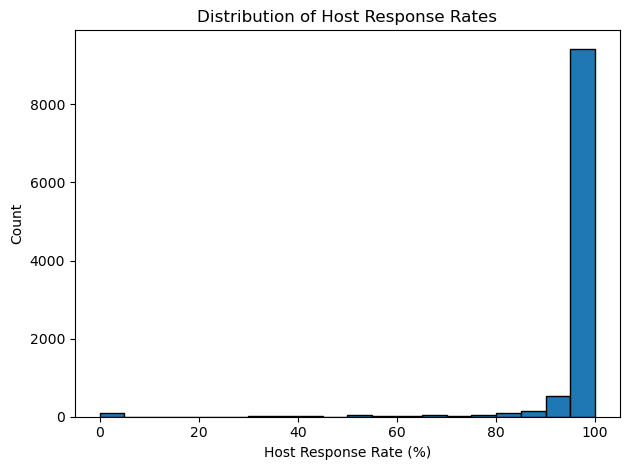

In [62]:
# 7: Host response rate
listings_df['host_response_rate'] = listings_df['host_response_rate'].str.rstrip('%').astype(float)
plt.hist(listings_df['host_response_rate'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Host Response Rate (%)')
plt.ylabel('Count')
plt.title('Distribution of Host Response Rates')
plt.tight_layout()
plt.show()

In [63]:
# Insight 7: The histogram visualizes the distribution of host response rates, indicating the promptness and engagement of hosts in responding to inquiries.
# Benefit: Decision-makers can encourage hosts to maintain high response rates to improve customer satisfaction and booking conversions.
